In [98]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re

In [99]:
fake_news = pd.read_csv('Fake.csv')

In [100]:
true_news = pd.read_csv('True.csv')

In [101]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [103]:
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [104]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [105]:
true_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [106]:
#Target variable for fake news
fake_news['output']=0

#Target variable for true news
true_news['output']=1

In [107]:
#Concatenating and dropping for fake news
fake_news['news']=fake_news['title']+fake_news['text']
fake_news=fake_news.drop(['title', 'text'], axis=1)

#Concatenating and dropping for true news
true_news['news']=true_news['title']+true_news['text']
true_news=true_news.drop(['title', 'text'], axis=1)

#Rearranging the columns
fake_news = fake_news[['subject', 'date', 'news','output']]
true_news = true_news[['subject', 'date', 'news','output']]

In [108]:
fake_news

,subject,date,news,output
0,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...,0
1,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...,0
2,News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...,0
3,News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...,...,...
23476,Middle-east,"January 16, 2016",McPain: John McCain Furious That Iran Treated ...,0
23477,Middle-east,"January 16, 2016",JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,Middle-east,"January 15, 2016",Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,Middle-east,"January 14, 2016",How to Blow $700 Million: Al Jazeera America F...,0


In [109]:
true_news

,subject,date,news,output
0,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",1
1,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,1
2,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,1
4,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,1
...,...,...,...,...
21412,worldnews,"August 22, 2017",'Fully committed' NATO backs new U.S. approach...,1
21413,worldnews,"August 22, 2017",LexisNexis withdrew two products from Chinese ...,1
21414,worldnews,"August 22, 2017",Minsk cultural hub becomes haven from authorit...,1
21415,worldnews,"August 22, 2017",Vatican upbeat on possibility of Pope Francis ...,1


In [110]:
fake_news['date'].value_counts()

May 10, 2017         46
May 26, 2016         44
May 6, 2016          44
May 5, 2016          44
May 11, 2016         43
                     ..
December 9, 2017      1
December 4, 2017      1
November 19, 2017     1
November 20, 2017     1
Jul 19, 2015          1
Name: date, Length: 1681, dtype: int64

In [111]:
#Removing links and the headline from the date column
fake_news=fake_news[~fake_news.date.str.contains("http")]
fake_news=fake_news[~fake_news.date.str.contains("HOST")]

In [112]:
#Converting the date to datetime format
fake_news['date'] = pd.to_datetime(fake_news['date'])
true_news['date'] = pd.to_datetime(true_news['date'])

In [113]:
frames = [fake_news, true_news]
news_dataset = pd.concat(frames)

In [114]:
news_dataset

,subject,date,news,output
0,News,2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,0
1,News,2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,0
2,News,2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,0
3,News,2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...,...,...
21412,worldnews,2017-08-22,'Fully committed' NATO backs new U.S. approach...,1
21413,worldnews,2017-08-22,LexisNexis withdrew two products from Chinese ...,1
21414,worldnews,2017-08-22,Minsk cultural hub becomes haven from authorit...,1
21415,worldnews,2017-08-22,Vatican upbeat on possibility of Pope Francis ...,1


In [26]:
news_dataset["subject"].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east', 'politicsNews', 'worldnews'], dtype=object)

In [28]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
news_dataset.isnull().sum()

subject    0
date       0
news       0
output     0
dtype: int64

<AxesSubplot:xlabel='output', ylabel='count'>

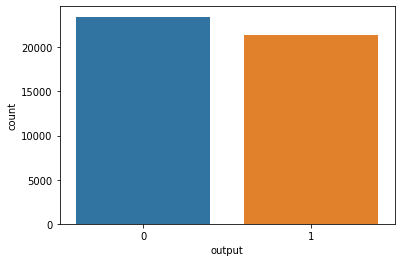

In [35]:
sns.countplot(x='output',data=news_dataset)

In [37]:
port_stem=PorterStemmer()

In [39]:
def stemming(contents):
    stemmed_content=re.sub('[^a-zA-Z]',' ',contents)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [43]:
news_dataset['news']=news_dataset['news'].apply(stemming)

In [44]:
news_dataset

,subject,date,news,output
0,News,2017-12-31,donald trump send embarrass new year eve messa...,0
1,News,2017-12-31,drunk brag trump staffer start russian collus ...,0
2,News,2017-12-30,sheriff david clark becom internet joke threat...,0
3,News,2017-12-29,trump obsess even obama name code websit imag ...,0
4,News,2017-12-25,pope franci call donald trump christma speechp...,0
...,...,...,...,...
21412,worldnews,2017-08-22,fulli commit nato back new u approach afghanis...,1
21413,worldnews,2017-08-22,lexisnexi withdrew two product chines marketlo...,1
21414,worldnews,2017-08-22,minsk cultur hub becom authoritiesminsk reuter...,1
21415,worldnews,2017-08-22,vatican upbeat possibl pope franci visit russi...,1


In [49]:
news_dataset['number_of_characters'] = news_dataset['news'].apply(lambda x:len(x))
news_dataset['number_of_words'] = news_dataset['news'].apply(lambda x:len(nltk.word_tokenize(x)))

In [50]:
news_dataset

,subject,date,news,output,number_of_characters,number_of_words
0,News,2017-12-31,donald trump send embarrass new year eve messa...,0,1732,274
1,News,2017-12-31,drunk brag trump staffer start russian collus ...,0,1269,191
2,News,2017-12-30,sheriff david clark becom internet joke threat...,0,2240,357
3,News,2017-12-29,trump obsess even obama name code websit imag ...,0,1743,286
4,News,2017-12-25,pope franci call donald trump christma speechp...,0,1322,218
...,...,...,...,...,...,...
21412,worldnews,2017-08-22,fulli commit nato back new u approach afghanis...,1,1778,269
21413,worldnews,2017-08-22,lexisnexi withdrew two product chines marketlo...,1,558,80
21414,worldnews,2017-08-22,minsk cultur hub becom authoritiesminsk reuter...,1,1195,178
21415,worldnews,2017-08-22,vatican upbeat possibl pope franci visit russi...,1,820,123


In [52]:
# statical info for True news
news_dataset[['number_of_characters','number_of_words']][news_dataset['output'] == 0].describe()

,number_of_characters,number_of_words
count,23471.000000,23471.000000
mean,1586.426952,249.141494
std,1543.399360,238.169100
min,17.000000,3.000000
25%,931.000000,147.000000
50%,1347.000000,213.000000
75%,1865.000000,293.000000
max,32938.000000,4989.000000


In [54]:
# statical info for fake news
news_dataset[['number_of_characters','number_of_words']][news_dataset['output'] == 1].describe()

,number_of_characters,number_of_words
count,21417.000000,21417.000000
mean,1540.136340,236.888546
std,1039.629357,160.995397
min,28.000000,4.000000
25%,628.000000,96.000000
50%,1436.000000,221.000000
75%,2063.000000,318.000000
max,15236.000000,2378.000000


<AxesSubplot:xlabel='number_of_words', ylabel='Count'>

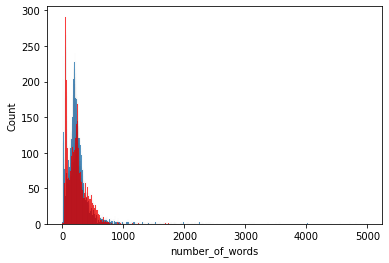

In [55]:
# histplot for Fake News words and True News words
sns.histplot(news_dataset['number_of_words'][news_dataset['output'] == 0],bins=50,binwidth=2)
sns.histplot(news_dataset['number_of_words'][news_dataset['output'] == 1],color='red',binwidth=2)

In [58]:
# import wordcloud
from wordcloud import WordCloud

# make object of wordcloud
wc = WordCloud(background_color='white',min_font_size=10,width=500,height=500)

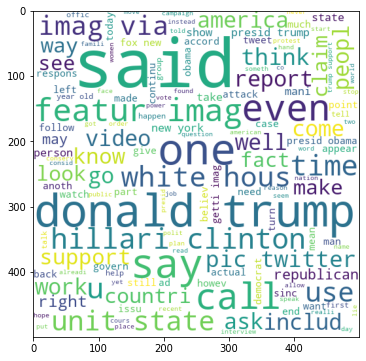

In [63]:
# WordCloud for Fake News
true_news_wc = wc.generate(news_dataset[news_dataset['output'] == 0]['news'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(true_news_wc)
plt.show()

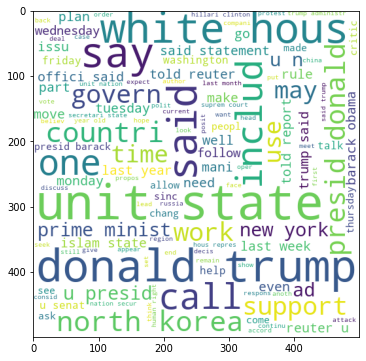

In [64]:
# WordCloud for True News
true_news_wc = wc.generate(news_dataset[news_dataset['output'] == 1]['news'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(true_news_wc)
plt.show()

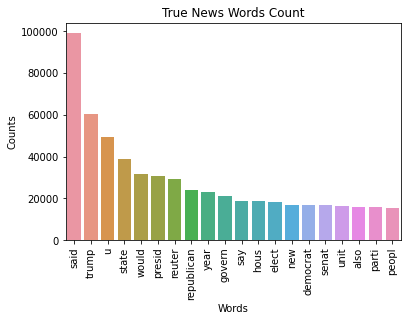

In [65]:
# library for Count Words
from collections import Counter

# create list of True News words
true_news_words_list = news_dataset[news_dataset['output']==1]['news'].str.cat(sep = " ").split()

# create DataFrame of that
true_news_words_df = pd.DataFrame(Counter(true_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=true_news_words_df[0],y=true_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('True News Words Count')
plt.show()

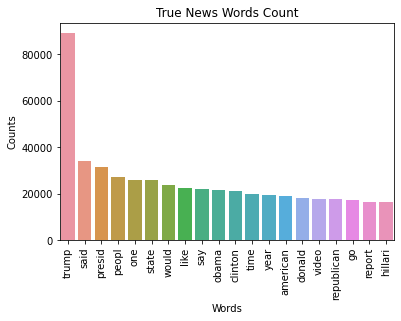

In [66]:
# library for Count Words
from collections import Counter

# create list of Fake News words
true_news_words_list = news_dataset[news_dataset['output']==0]['news'].str.cat(sep = " ").split()

# create DataFrame of that
true_news_words_df = pd.DataFrame(Counter(true_news_words_list).most_common(20))

# Now Let's Plot barplot of this words
sns.barplot(x=true_news_words_df[0],y=true_news_words_df[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('True News Words Count')
plt.show()

In [124]:
# Let's Separate our Input and Output Columns
X = news_dataset['news'].values
Y = news_dataset['output'].values

In [125]:
vectorizer=TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)

In [126]:
# let's do Train Test Split of Our Data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [127]:
model=LogisticRegression()

In [128]:
model.fit(X_train,Y_train)

LogisticRegression()

In [129]:
X_train_prediction=model.predict(X_train)
accuracy_train=accuracy_score(X_train_prediction,Y_train)

In [130]:
print('Accuracy score of the training data : ', accuracy_train)

Accuracy score of the training data :  0.9924533556112504


In [132]:
X_test_prediction=model.predict(X_test)
accuracy_test=accuracy_score(X_test_prediction,Y_test)

In [133]:
print('Accuracy score of the test data : ', accuracy_test)

Accuracy score of the test data :  0.9871909111160615
